# Fish Market-Multilinear Regression

**dataset** : https://www.kaggle.com/datasets/aungpyaeap/fish-market

**Story**: 

I am an adventurer who is sailing from Aegean Sea to Canary Islands. The weather is perfect, forecasts are good.  And what the hell..A hurricane is coming directly to me.....

When I woke up I was  on the piece of wooden in the middle of the sea and there was only fishing line near me. I had to catch fish in order not to starve, I tried , tried..... Finally, towards to morning the fishing line had started to move. I pulled it  with all my might, yes I had catched a Bream. The other seven days I catched 56 Perch, 34 Bream, 20 Roach, 17 Pike, 14 Smelt,11 Parkki, 6 Whitefish of different sizes, widths, lengths and weights.

I need to know the weight of the fish I would catch the next day, so that I can adjust the amount of protein and calories I would take during the day. 

**Variables**:

* Species : Fish species
* Weight  : Weight of fish (gram)
* Length1 : Vertical Lenght of fish (cm)
* Length2 : Diagonal Lenght of fish (cm)
* Length3 : Cross Lenght of fish (cm)
* Height  : Height of fish (cm)
* Width   : Width of fish (cm)

**Dependent Variable**:

Weight  : Weight of fish (gram)

**ML Models**: 

stats(smf), sckitlearn(LinearRegression)

-------------

#### Species

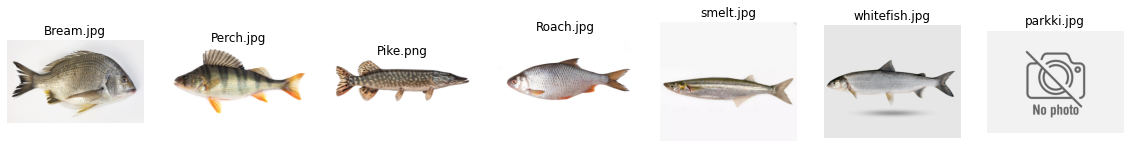

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_list = ["Bream.jpg", "Perch.jpg", "Pike.png", "Roach.jpg", "smelt.jpg", "whitefish.jpg", "parkki.jpg"]

fig = plt.figure(figsize=(20, 15))

rows = 1
columns = len(img_list)
path = "fish_pic/"

for num, name in enumerate(img_list):
    
    fig.add_subplot(rows, columns, num+1)
    
    plt.imshow(mpimg.imread(path+name))
    
    plt.axis('off')
    
    plt.title(name)

-----------------

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.formula.api as smf

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [3]:
# load data

df_ = pd.read_csv("Fish.csv")

In [4]:
# copy df_

df = df_.copy()

# 1- Summary Statistics

In [5]:
# type of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# Describe min,max,mean,median of variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


* Weight variable mean and median values are far from each other 
* Weight variable's 75% and max values are not consistent compared with it's min, 25%, and %50 values.
* Statistical values of other variables are self-consistent.

In [7]:
# Species and counts

unique = df["Species"].value_counts()
unique

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

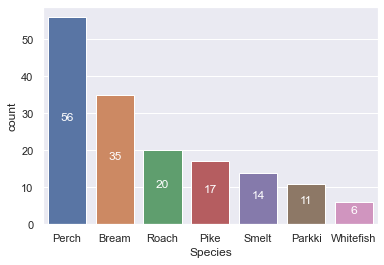

In [8]:
# Bar Graph of Species 

sns.set_theme(style="darkgrid")

bar_graph = sns.countplot(data = df, x= df["Species"], order = df["Species"].value_counts().index);

for i in range(len(unique)):
    
    bar_graph.text(i, unique[i]/2, str(unique[i]), color ="white", horizontalalignment = "center")

In [9]:
# is there null value?

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

--------------

# 2 - EDA (Exploratory Data Analysis)

#### Renaming the "Length 1, Length 2, Length 3" columns to be more descriptive

In [10]:
# rename the columns

df = df.rename(columns={"Length1": "Vertical_Len", "Length2": "Diagonal_Len", "Length3": "Cross_Len"})

--------------

#### Numeric and Categoric Columns

In [11]:
# Num and cat columns

num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

------------

#### Histogram Analysis 

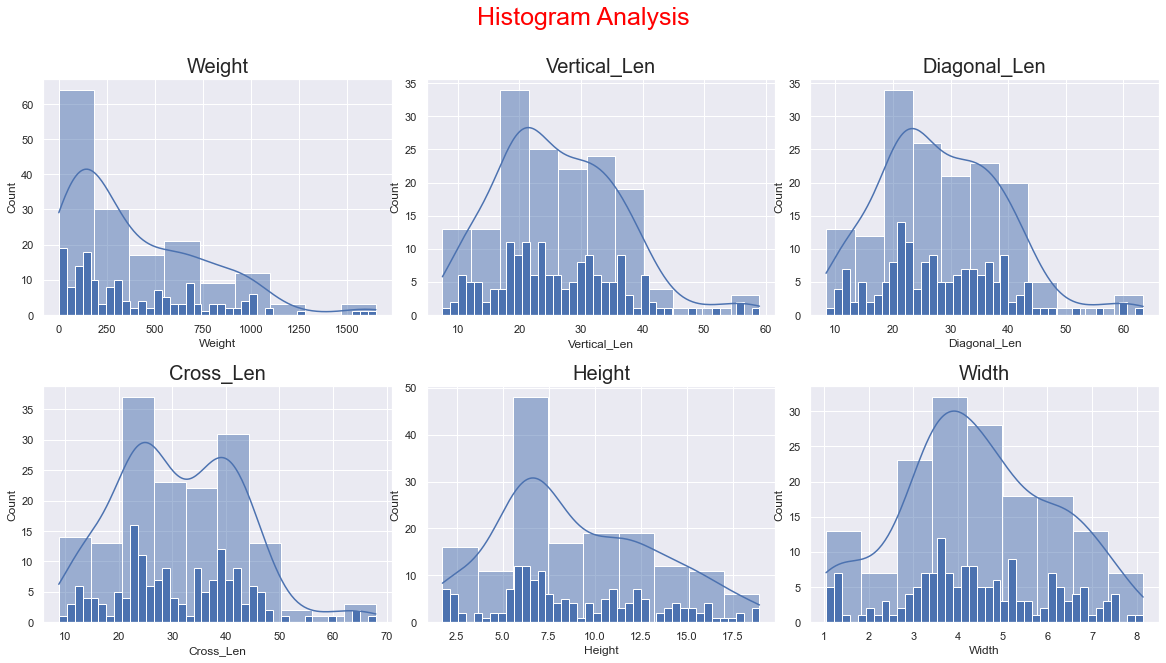

In [12]:
# histogram plots 

fig, axes = plt.subplots(2, 3, figsize=(20,10))

fig.subplots_adjust(wspace=0.1, hspace=0.3)

fig.suptitle('Histogram Analysis', fontsize=25, color = "red")

axes = axes.ravel()

for i, col in enumerate(num_cols):
    
    sns.histplot(data = df[col], ax=axes[i], kde=True);
    
    df[col].hist(bins = 40, ax=axes[i])
    
    axes[i].set_title(col, size = 20)

* "Weight" is Right Skewed, the other variables are not very skewed, near normal distribution. 
* To get a normal distribution from skewed values, the Solution may be to take the logarithmic transformation of "Weight".
* In this work I won't use log inversion to avoid confusion.

--------------

#### Correleation 

In [13]:
# correlation of variables as dataframe

df.corr()

,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Vertical_Len,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Diagonal_Len,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Cross_Len,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


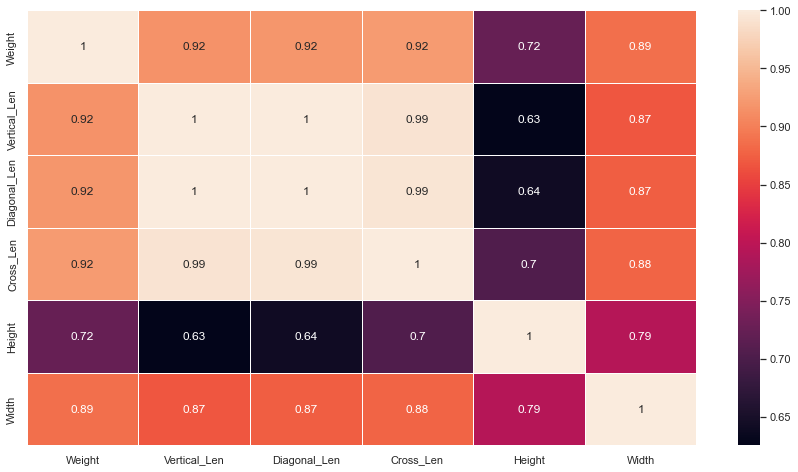

In [14]:
# visualization of correlations

plt.figure(figsize=(15,8)) 

sns.heatmap(df.corr(),linewidths=1, annot=True);

In [15]:
# creating reference correlation table

correlation = {"Value":["0", "0.001 - 0.250","0.251 - 0.500", "0.501 - 0.750", "0.751 - 0.999","1"],
               "Correlation":["No","Very Weak", "Medium", "Strong", "Very Strong","Perfect"],
               "Interpretation":["No relation","Small","Acceptable","Strong", "Very Strong","Perfect"]} 
    
df_correlation = pd.DataFrame(correlation)

df_correlation

,Value,Correlation,Interpretation
0,0,No,No relation
1,0.001 - 0.250,Very Weak,Small
2,0.251 - 0.500,Medium,Acceptable
3,0.501 - 0.750,Strong,Strong
4,0.751 - 0.999,Very Strong,Very Strong
5,1,Perfect,Perfect


----------------------

#### Scatter Plot

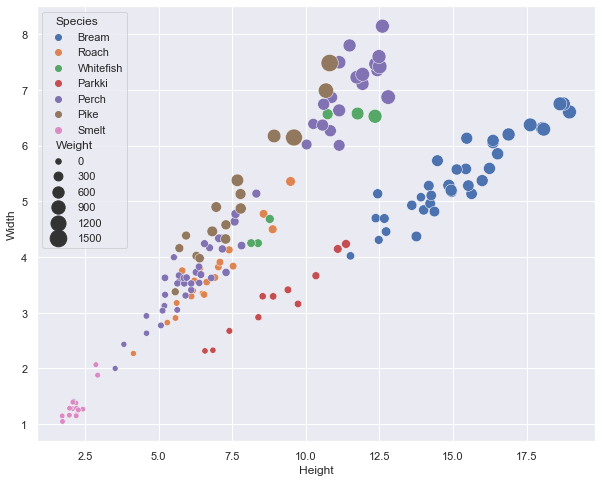

In [16]:
# Graph of Height and Width variable according to Species including "Weight" variable

plt.figure(figsize=(10,8))

sns.scatterplot(data = df, x = "Height", y ="Width", size="Weight", hue="Species",sizes=(30, 300));

* "Height" and "Width" values of fish increase in direct proportion as two linear paths close to each other. 
* This may be due to fish species living in deep and medium depths or another reason.
* The "weight" value also appears on the graph as larger circles with the increasing trend.

-----------------

#### Pair Plot

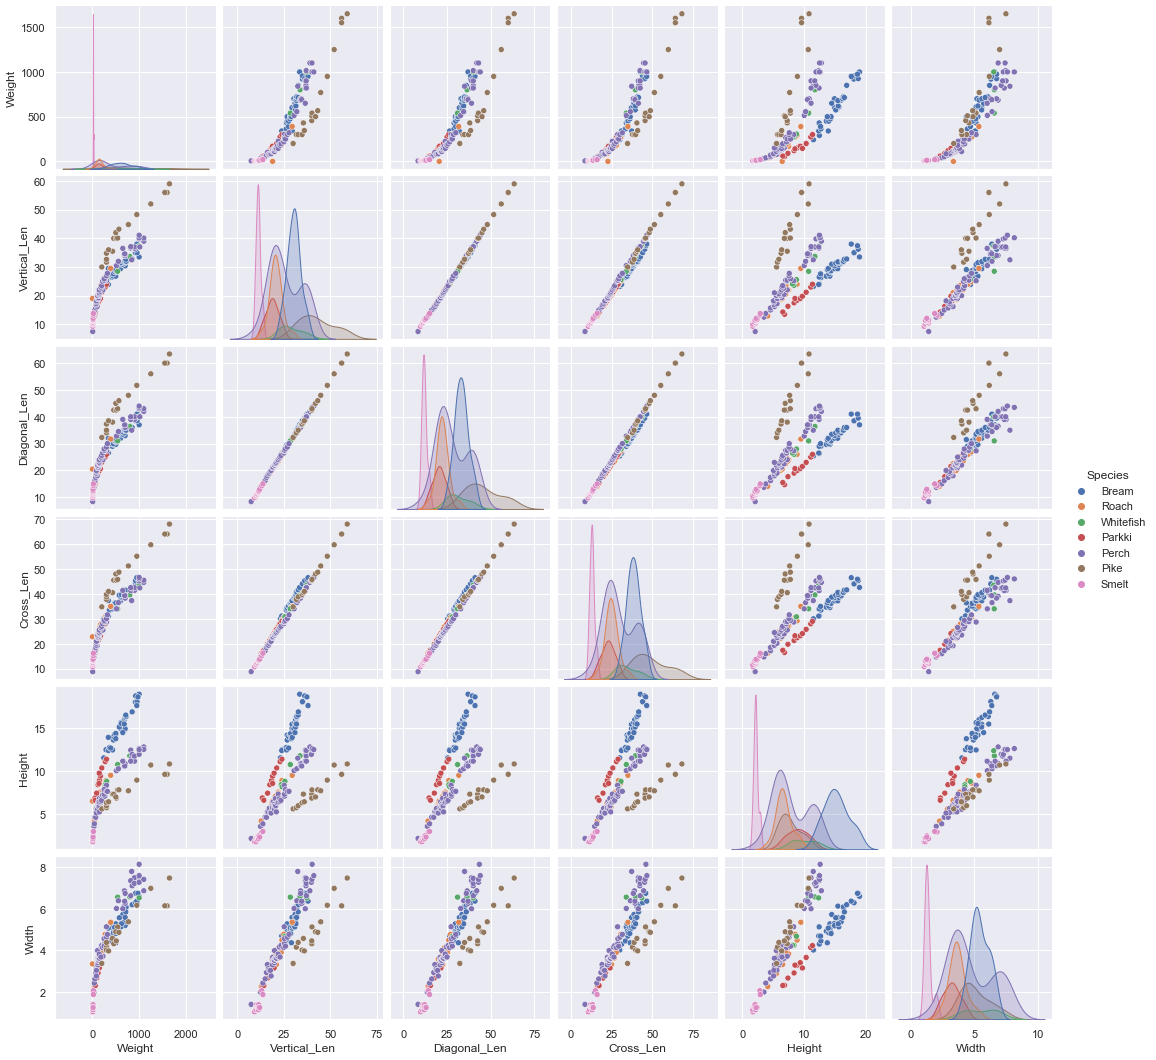

In [17]:
# to compare each variable with others 

sns.pairplot(df, hue="Species");

**Interpretation**

* according to reference table, dependent variable ("Weight") has:
    - "Positive Very Strong correlation" with Width (0.89)
    - "Positive Strong correlation" with Height (0.72)
    - "Positive Very Strong correlation" with all Lenghts (0.92)
    - All lenghts variables are "Positive nearly Perfecet correlation" eachother. They have the same correlation values  with "Weight" variable.
    - it is needed to carry out Multicollinetary analysis 

-------------

### Multi-Collinearity Analysis - VIF

In [18]:
X = df[num_cols].drop("Weight", axis=1)

vif_data = pd.DataFrame()

vif_data["col_name"] = X.columns

vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))]

vif_data.sort_values(by="VIF", ascending = False)

,col_name,VIF
1,Diagonal_Len,16598.744318
0,Vertical_Len,12782.535830
2,Cross_Len,3380.815907
4,Width,92.658672
3,Height,76.064364


* Length variables seem highly correlated each other, this causes the difficulty to distinguish each individual variable effect on dependent variable.

* As a result ; Vertical_Len, Diagonal_len and Cross_Len are highly big values, so we can leave out Vertical_len and Cross_len columns during creating model.

---------------

## Outliers

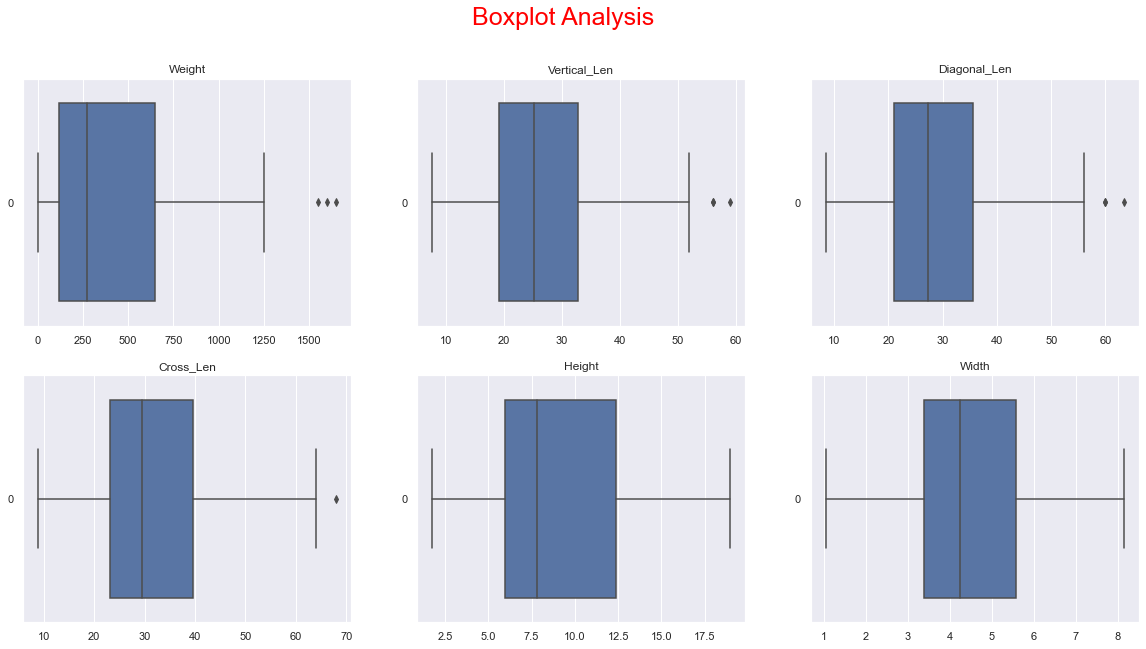

In [19]:
num_cols = df.select_dtypes(include="number").columns

fig, axes = plt.subplots(2,3,figsize=(20,10))

fig.suptitle('Boxplot Analysis', fontsize=25, color = "red")

axes = axes.ravel()

for i,col in enumerate(num_cols):
    
    axes[i].set_title(col)
    
    box = sns.boxplot(data=df[col], ax=axes[i], orient = "h")
    

#### Function for Replacing Outliers with threshold

In [20]:
def fill_outliers(dataframe, col_name, low_perc = 0.25, up_perc = 0.75):

    lower = np.quantile(dataframe[col_name], low_perc)
    upper = np.quantile(dataframe[col_name], up_perc)
    iqr = upper - lower

    low_threshold = lower - 1.5*iqr
    up_threshold  = upper + 1.5*iqr

    df.loc[(dataframe[col_name] < low_threshold), col_name] = low_threshold
    df.loc[(dataframe[col_name] > up_threshold),  col_name] = up_threshold
    
    return dataframe

In [21]:
# applying function to all numeric variables

for i in num_cols:
    
     fill_outliers(df, i) 

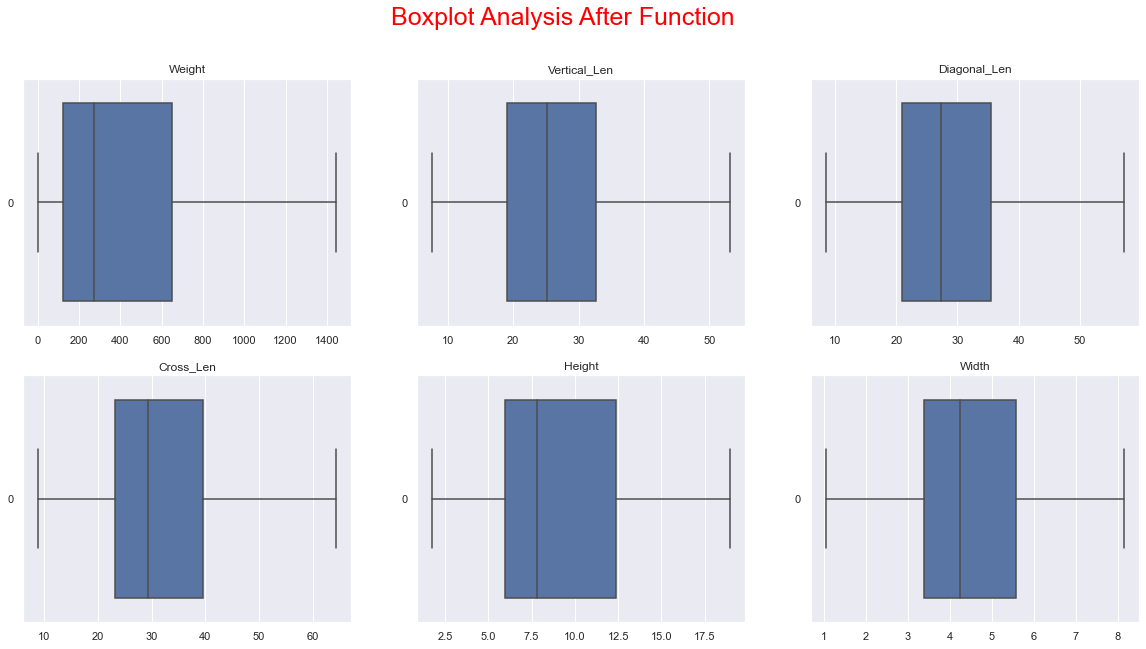

In [22]:
# boxplot check

fig, axes = plt.subplots(2,3,figsize=(20,10))

fig.suptitle('Boxplot Analysis After Function', fontsize=25, color = "red")

axes = axes.ravel()

for i,col in enumerate(num_cols):
    
    sns.boxplot(data=df[col], ax=axes[i], orient = "h")
    
    axes[i].set_title(col) 

-------------------

### Searching for Zero

In [23]:
print(df.eq(0).sum())

Species         0
Weight          1
Vertical_Len    0
Diagonal_Len    0
Cross_Len       0
Height          0
Width           0
dtype: int64


In [24]:
df.drop(df[df["Weight"] == 0].index, inplace=True)

* "Weight" variable has zero value. In the normal condition, any variables can't be zero if there is accurate calculation. Hence I delete the row with zero value

-----------

### Create Volume Variable

In [25]:
df["Volume"] = df["Width"]*df["Height"]*df["Vertical_Len"]

In [26]:
df.head()

,Species,Weight,Vertical_Len,Diagonal_Len,Cross_Len,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1074.401280
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1289.613312
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1389.244539
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1491.696944
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1693.018644


----------
----------

# 3- Machine Leraning Models

## Modeling via smf


In [27]:
# apply stats - smf 

lm = smf.ols("Weight ~ Height + Width + Vertical_Len + Volume" , df)

model = lm.fit()

In [28]:
# statistics summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1101.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.34e-111
Time:                        11:08:38   Log-Likelihood:                -880.34
No. Observations:                 158   AIC:                             1771.
Df Residuals:                     153   BIC:                             1786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -89.8427     26.097     -3.443      0.001    -141.399     -38.287
Height         -16.2303      2.532     -6.410      0.000     -21.232     -11.228
Width           -8.5098      8.776     -0.970      0.334     -25.847       8.827
Vertical_Len    12.5283      1.183     10.592      0.000      10.192      14.865
Volume           0.2409      0.013     19.249      0.000       0.216       0.266
==============================================================================
Omnibus:                       60.002   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.948
Skew:                           1.143   Prob(JB):                     4.35e-94
Kurtosis:                      10.751   Cond. No.                     9.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The R2 value is the value that shows what percentage of the dependent variable can be explained by the independent variables.
* independet variables can explain depent variable on ratio 80%
* [0.25 - 0.975] model confidance interval
* intercept is constant variable
* ols = Ordinary Least Squares function

#### Error

In [29]:
# RMSE - Root Mean Squared Error

np.sqrt(model.mse_model)

2144.6946942158

In [30]:
# predicted values

data = model.fittedvalues
data

0      238.456950
1      282.313072
2      303.397224
3      354.477294
4      404.349644
          ...    
154     16.516400
155     15.191471
156     22.441942
157     30.197496
158     37.784233
Length: 158, dtype: float64

### Predict and Actual Value Plot

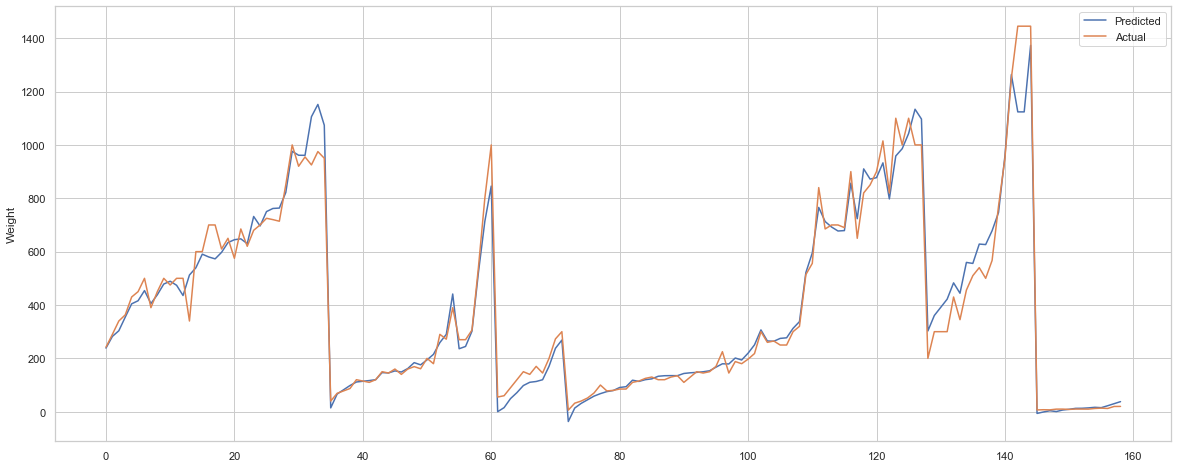

In [31]:
sns.set_style("whitegrid")

plt.figure(figsize=(20,8))

sns.lineplot(data = model.fittedvalues, label="Predicted");

sns.lineplot(data = df["Weight"], label="Actual");

* it seems highly good prediction being created by smf

---------------------
---------------------

## Modelling via Sckitlearn 

#### preparing tha data from the beginning to new clean start

In [32]:
# create df
df = df_.copy()

# changing columns name
df = df.rename(columns={"Length1": "Vertical_Len", "Length2": "Diagonal_Len", "Length3": "Cross_Len"})

# outliers 
for i in num_cols:
    
     fill_outliers(df, i)
        
# zero value
df.drop(df[df["Weight"] == 0].index, inplace=True)

# new variable
df["Volume"] = df["Width"]*df["Height"]*df["Vertical_Len"]

# multicollinearty 
df = df.drop(["Diagonal_Len","Cross_Len"], axis=1)

### One Hot Encoder 

In [33]:
df = pd.get_dummies(df, columns=["Species"])
df.head()

,Weight,Vertical_Len,Height,Width,Volume,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,1074.401280,1,0,0,0,0,0,0
1,290.0,24.0,12.4800,4.3056,1289.613312,1,0,0,0,0,0,0
2,340.0,23.9,12.3778,4.6961,1389.244539,1,0,0,0,0,0,0
3,363.0,26.3,12.7300,4.4555,1491.696944,1,0,0,0,0,0,0
4,430.0,26.5,12.4440,5.1340,1693.018644,1,0,0,0,0,0,0


### Robust Scaler

In [34]:
# split data as depent and independent to apply scale only on the independent variables.

X = df.drop("Weight", axis = 1)

y = df[["Weight"]]

In [35]:
scaler = RobustScaler()
    
X_scaled = scaler.fit_transform(X)  

-----------------

### Test and Train Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=101)

reg_model = LinearRegression().fit(X_train, y_train)

In [37]:
print("intercept:", reg_model.intercept_[0])
print("-*-*-*-*-*-*-*-*-*-*-*-*")
print("coefficients:", reg_model.coef_[0])

intercept: 281.82050925225417
-*-*-*-*-*-*-*-*-*-*-*-*
coefficients: [ 169.81313761 -134.41227457  -26.46872385  517.32159782    7.67147547
   43.12142389   -8.93520036  -73.87892168   -3.4261309   -23.15219002
   58.59954359]


--------------

### Evaluating Model Forecasting Success

#### Train error

In [38]:
y_pred = reg_model.predict(X_train)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))

np.round(RMSE_train,2)

44.3

In [39]:
# R2 
reg_model.score(X_train, y_train)

0.9823658583747761

#### Test error

In [40]:
y_pred = reg_model.predict(X_test)

RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

np.round(RMSE_train,2)

44.3

In [41]:
# R2 
reg_model.score(X_test, y_test)

0.9250626521364352

#### K-Fold Cross Validation

In [42]:
# 10 fold 

cv=cross_val_score(reg_model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")
cv

array([-1037.55485086, -2445.43915472, -5749.46195834, -1300.6582297 ,
       -3756.2994315 , -2824.60942118, -2380.42833544, -1572.83038184,
       -2764.47709477,  -828.88556132])

In [43]:
RMSE_cross = np.sqrt(np.mean(-cv))
np.round(RMSE_cross,2)

49.66

----------------
---------------

# 4- Example prediction
#### Change variables which are the "vertical_len", "Height", "Width", and which kind of fish Specie you catch make 1, other species are 0

In [44]:
# creating a dataframe for prediction.

new_data = pd.DataFrame({'Vertical_Len':30, 
                         'Height':20, 
                         'Width':7, 
                         'Species_Bream':1,
                         'Species_Parkki':0, 
                         'Species_Perch':0,
                         'Species_Pike':0,
                         'Species_Roach':0,
                         'Species_Smelt':0,
                         'Species_Whitefish':0,},index=[0])

# insert "Volume" column for creating dataframe truly. it is important where the column is, so I used df.insert method 

new_data.insert(loc=3, column='Volume', value=new_data["Vertical_Len"]*new_data["Height"]*new_data["Width"])                         

In [45]:
new_data

,Vertical_Len,Height,Width,Volume,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,30,20,7,4200,1,0,0,0,0,0,0


In [46]:
new_data_scaled = scaler.transform(new_data)

predict_value = reg_model.predict(new_data_scaled)

predict_value = round(predict_value.item(),3)

print(f"Predicted Weight: {predict_value}")

Predicted Weight: 911.956


-------------

## Visualization of Predicted Data

In [47]:
# df dataframe for reaching Species

df = df_.copy()

In [48]:
# insert predict_value into  "new_data" dataframe as "Weight" column

new_data.insert(loc=3, column='Weight', value=predict_value)   

In [49]:
# remove columns with zero values, the column with 1 value means that you catch that kind of fish.

# replace zero with NaN 
new_data.replace(0, float("NaN"), inplace=True)

# Drop the columns with NaN
new_data.dropna(how='all', axis=1, inplace=True)

In [50]:
# Rename new_data["Species_****"] column name as ["Species"] and change value of column as fish name

# choose the column starts with "Species_" which was created by one hot enceder
filter_col = [col for col in new_data if col.startswith('Species_')]

# rename the that column as Species
new_data.rename({filter_col[0]:"Species"}, axis=1, inplace = True)

# attend new value as fish name
new_data["Species"] = filter_col[0][8:]

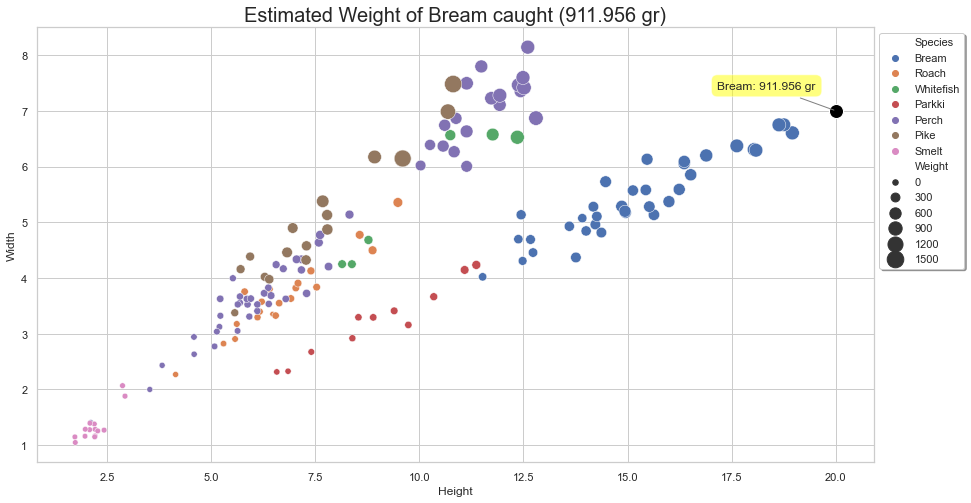

In [51]:
#fig size
plt.figure(figsize=(15,8))

# Main data with all species
sns.scatterplot(data = df, x = "Height", y ="Width", sizes=(30, 300), size = "Weight", hue="Species");

# create predicted "weight" data circle size called "data_size"  for comparing with actual weights circle sizes.
if 0 <= new_data["Weight"][0] < 300:
    data_size = 50
if 300 <= new_data["Weight"][0]  < 600:
    data_size = 100
if 600 <= new_data["Weight"][0]  < 900:
    data_size = 150
if 900 <= new_data["Weight"][0]  < 1200:
    data_size = 200 
if 1200 <= new_data["Weight"][0]  < 1500:
    data_size = 250
if 1500 <= new_data["Weight"][0] :
    data_size = 300 

# predicted data with black dot
sns.scatterplot(data = new_data, x = "Height", y ="Width", sizes=(30, 300), s = data_size,  hue = "Weight", palette=['black'], legend = False)

# annotation and arrow 
plt.annotate((new_data["Species"][0] +": "+ new_data["Weight"][0].astype("str") +" gr"),
             
             xy=(new_data.Height, new_data.Width),
             
             textcoords='offset points', ha='right', va='bottom',
             
             xytext=(-20, 20),
             
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             
             arrowprops=dict(arrowstyle="-", color = "grey"));

# legend
plt.legend(loc = 2, bbox_to_anchor = (1,1), shadow = True)

# title
plt.title(("Estimated Weight of " + new_data["Species"][0] +" caught"+" ("+ new_data["Weight"][0].astype("str") +" gr)"), size= 20)


plt.show();

---------------

# Results

* RMSE value decreased in highly big proportinal after I added new Volume variable
* R2 values were increased after added Volume variable
* Robust Scaler and One hot Scaler were worked well
* Predicted values are highly in agreement with actual data.
* At the end of this story I am still alive ..:)

### Thanks for reading I hope you were able to find it helpful.

* Hakan Sarıtaş
* linkedin: https://www.linkedin.com/in/hakansaritas/
* email: saritas_hakan@yahoo.com